In [1]:
import numpy as np
import pandas as pd

train = pd.read_json('data/cooking/train.json')
train.set_index('id',inplace=True)

test = pd.read_json('data/cooking/test.json')
test.set_index('id',inplace=True)

In [2]:
len(train)

39774

In [3]:
data = train.copy()

In [4]:
data.ingredients

id
10259    [romaine lettuce, black olives, grape tomatoes...
25693    [plain flour, ground pepper, salt, tomatoes, g...
20130    [eggs, pepper, salt, mayonaise, cooking oil, g...
22213                  [water, vegetable oil, wheat, salt]
13162    [black pepper, shallots, cornflour, cayenne pe...
6602     [plain flour, sugar, butter, eggs, fresh ginge...
42779    [olive oil, salt, medium shrimp, pepper, garli...
3735     [sugar, pistachio nuts, white almond bark, flo...
16903    [olive oil, purple onion, fresh pineapple, por...
12734    [chopped tomatoes, fresh basil, garlic, extra-...
5875     [pimentos, sweet pepper, dried oregano, olive ...
45887    [low sodium soy sauce, fresh ginger, dry musta...
2698     [Italian parsley leaves, walnuts, hot red pepp...
41995    [ground cinnamon, fresh cilantro, chili powder...
31908    [fresh parmesan cheese, butter, all-purpose fl...
24717    [tumeric, vegetable stock, tomatoes, garam mas...
34466    [greek yogurt, lemon curd, confectioners sug

In [5]:
ingredients = np.unique(np.concatenate(np.array(data.ingredients)))

In [6]:
print(ingredients.size)
print(ingredients)

6714
['(    oz.) tomato sauce' '(   oz.) tomato paste'
 '(10 oz.) frozen chopped spinach' ..., 'ziti' 'zucchini'
 'zucchini blossoms']


нищо прекалено трагично, но изглежда имаме някои странни и може би безполезни неща (blood?)

In [7]:
data.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish',
       'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese',
       'cajun_creole', 'brazilian', 'french', 'japanese', 'irish',
       'korean', 'moroccan', 'russian'], dtype=object)

In [8]:
for ingredient in ingredients:
    data[ingredient] = data.ingredients.apply(lambda ingList: ingredient in ingList)
    #data.assign(ingredient = lambda ingArr: ingredient in ingArr)
data = data.drop(labels = "ingredients", axis = 1)

one-hot encode-ваме като за начало

In [9]:
data

,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
10259,greek,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25693,southern_us,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20130,filipino,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22213,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13162,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6602,jamaican,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42779,spanish,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3735,italian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16903,mexican,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
X = data.drop(labels = "cuisine", axis = 1)
y = data["cuisine"]

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.874220583305
test score:  0.770514883347


не изглежда лошо, но овърфитвме с 10-ина процента. Все пак за baseline модел е доста радващ резултат

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.992222594703
test score:  0.666532582462


още повече оувърфит с дефоутните параметри - може да пробваме и други (но вероятно ще е безполезно усилие)

In [67]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{
    'bootstrap': [False, True],
    'max_depth': [10, 100, 1000],
    'max_features': [500, 1000, 2000, 5000, 6714]
}]

search = GridSearchCV(model, parameters)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

внимание: много бавна клетка (много, много). Целта и е да илюстрира теорията ми за random forest-a. decision дърветата "цепят" пространствата на сектори и в този смисъл вероятно ще е трудно за тях да изкарат нещо от тези бинарни пространства (множества от 0 и 1). Оттук нататък смятам да не използвам random forest (освен с някакъв dimentionality reduction). Резултатът за най-доброто е: {'max_depth': 1000, 'bootstrap': False, 'max_features': 500}

това ме навежда на мисълта, че логистичната регресия също може да се изпили. Даже регуляризациите за нея и линейната регресия се използват точно затова - оправяне с overfit (чиято диагноза често е прекалено много фийчъри): L1 ще намали някои прекалено големи тегла, докато L2 понякога изцяло може да се оттърве от някои фийчъри. Да ги пробваме:

In [17]:
model = LogisticRegression()

In [17]:
parameters = [{
    'n_jobs': [1],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}]

search = GridSearchCV(model, parameters)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Best params:
{'n_jobs': 1, 'solver': 'liblinear', 'C': 1, 'penalty': 'l2'}

Best cross-validation score: 0.77


исках да пробвам други solver-и и multi_class хиперпараметри, но те са доста по-бавни (може би за този брой фийчъри)

In [16]:
model = LogisticRegression(C = 0.1)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.779182031512
test score:  0.73159694288


При C=1 модела действително оувърфитва, но генерализацията му е по-добра отколкото при по-малки C-та (при по-големи оувърфита расте)

In [17]:
X_train.shape

(29830, 6714)

може би многото фийчъри разпределени върху всравнение с тях малко записи са проблем

In [18]:
X_train.describe()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
count,29830,29830,29830,29830,29830,29830,29830,29830,29830,29830,...,29830,29830,29830,29830,29830,29830,29830,29830,29830,29830
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,29821,29824,29827,29829,29829,29827,29827,29827,29829,29821,...,29667,29825,29827,29829,29822,29819,29822,29810,29138,29828


In [19]:
def getOneHotEncodedSubmition(data, model):
    submition = data.copy()

    ingredients = np.unique(np.concatenate(np.array(train.ingredients)))

    for ingredient in ingredients:
        submition[ingredient] = submition.ingredients.apply(lambda ingList: ingredient in ingList)
    submition = submition.drop(labels = "ingredients", axis = 1)

    submition["cuisine"] = model.predict(submition)
    submition = submition[["cuisine"]]

    return submition

In [20]:
model = LogisticRegression()
model.fit(X, y)

submition = getOneHotEncodedSubmition(test, model)
#submition.to_csv('~/Desktop/predictions.csv') # тест (78)

In [21]:
testIngredients = np.unique(np.concatenate(np.array(test.ingredients)))
np.intersect1d(testIngredients, np.setdiff1d(ingredients, testIngredients))

array([],
      dtype='<U71')

търсил съм "сечението на съставките на test-сета със разликата между съставките от test-сета с train-сета". Разликата ми дава масив от съставките, които са само в ястията на единя от двата, а сечението с тест ми дава съставките, които ги има само в test-сета - така разбирам, че всички съставки от test ги има и в train сета

In [22]:
test.shape

(9944, 1)

In [23]:
from sklearn.svm import LinearSVC

In [24]:
model = LinearSVC()

model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.936004022796
test score:  0.761464199517


SVM би трябвало да е най-доброто, което можем да направим за много фийчъри

In [27]:
parameters = [{
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}]

search = GridSearchCV(model, parameters)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Best params:
{'C': 0.1}

Best cross-validation score: 0.77


Резултатът тук много прилича на това, което изкарахме от логистичната регресия - може би защото по идея и двете чертаят прави, тези на логистичната регресия за liblinear със сигурност е на принципа one vs all и най-вероятно този на LinearSVC, също. Обикновено SVC изглежда като естествената стъпка - при него могат да се появят "полиномиални фийчъри" без ние да ги правим

In [43]:
from sklearn.svm import SVC

In [17]:
model = SVC(cache_size = 2048)

model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.275695608448
test score:  0.276850362027


документацията казва, че нилинейните SVC-та много разчитат на хиперпараметрите си. Тренирането на този обаче беше обезкуражаващо бавно

In [19]:
model.support_.shape

(29167,)

In [ ]:
model = SVC(cache_size = 2048, C = 0.01, tol = 0.1, max_iter = 10)

model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/usr/local/lib/python3.4/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


това обаче не изглежда като много добро решение

In [25]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

(20,)

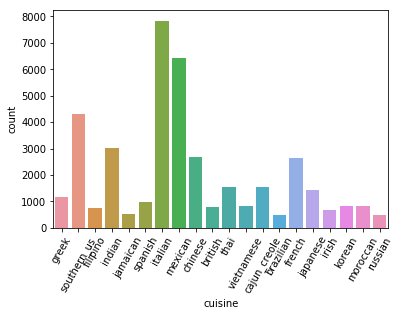

In [26]:
cuisineGraph = sns.countplot('cuisine', data=data)
_ = plt.setp(cuisineGraph.get_xticklabels(), rotation=60)

np.unique(y.tolist()).shape

(20,)

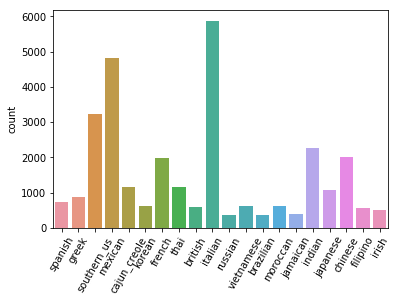

In [27]:
cuisineGraph = sns.countplot(y_train.tolist(), data=y_train)
_ = plt.setp(cuisineGraph.get_xticklabels(), rotation=60)

np.unique(y_train.tolist()).shape

както един от kernel-ите подсказва, можем да погледнем, че италия и мексико са много по-репрезентирани от русия например, но train_test_split със stratify е решил този проблем

In [16]:
sums = {}

for column in X.columns:
    sums[column] = (X[column].sum())

In [18]:
import collections

sumsOd = collections.OrderedDict(sorted(sums.items(), key=lambda x: x[1]))
for k, v in sumsOd.items(): 
    print(k, v)

lapsang 1
pocket bread 1
matsutake mushrooms 1
water chestnut powder 1
whole grain thin spaghetti 1
hubbard squash 1
brown sauce 1
soft rolls 1
hot fudge topping 1
orange glaze 1
alaskan king salmon 1
dulong 1
lamb neck fillets 1
fat free whipped topping 1
ice cream salt 1
mesquite flavored seasoning mix 1
dried raspberry 1
fat free ground turkey breast 1
pecan meal 1
annatto oil 1
crème de framboise 1
nonfat frozen yogurt 1
bread yeast 1
Bertolli® Arrabbiata Sauce 1
minced lean steak 1
chai tea concentrate 1
flower petals 1
cake mix or white yellow 1
McCormick Taco Seasoning 1
red anjou pears 1
fermented bean curd 1
guava paste 1
braising beef 1
gomashio 1
cornbread crumbs 1
comice pears 1
beluga lentil 1
sodium free chicken stock 1
tangelos 1
Mazola Canola Oil 1
Tamari Tamari 1
boneless chops 1
Franks Hot Sauce 1
creamer potatoes 1
belacan 1
Knorr® Pasta Sides™ - Chicken flavor 1
bird pepper 1
boneless pork tenderloin 1
multigrain cereal 1
fiber one 1
Wish-Bone® Robusto Italian Dress

Velveeta Cheese Spread 1
dried rigatoni 1
ranch-style seasoning 1
gluten-free oat 1
crab sticks 1
McCormick Poppy Seed 1
marrons 1
praline syrup 1
membrillo 1
italian sauce 1
cardoons 1
Knorr® Pasta Sides™ - Butter & Herb 1
fine egg noodles 1
seasoned ground turkey 1
oriental radish 1
stellette 1
whole wheat pasta shells 1
creole seafood seasoning 1
table syrup 1
tomato garlic pasta sauce 1
marrons glacés 1
chinese baby corn 1
peach salsa 1
granary bread 1
mashed cauliflower 1
hickory-flavored liquid smoke 1
apple puree 1
gluten-free bread 1
turbot fillets 1
slider rolls 1
nama shoyu 1
chive blossoms 1
won ton skins 1
diced mushrooms 1
pasta wagon wheel 1
chocolate graham cracker crumbs 1
turkey hot dogs 1
padron peppers 1
shiraz 1
hen 1
fiddlehead ferns 1
cabbage head 1
cipollini 1
dinosaur kale 1
freeze-dried strawberries 1
creole spice mix 1
bermuda onion 1
Knudsen Sour Cream 1
pepper cheese 1
goat milk feta 1
red grapefruit juice 1
tofu sour cream 1
gravy mix mushroom 1
Conimex Wok

cherry gelatin 2
long green beans 2
canned chipotles 2
breast 2
Morton Salt 2
White Lily Flour 2
microgreens 2
red pepper hot sauce 2
shoulder roast 2
apricot brandy 2
fresh brussels sprouts 2
hot italian turkey sausage 2
gobo root 2
satsuma orange 2
low-fat goat cheese 2
frozen brussels sprouts 2
minced peperoncini 2
lipton tea bags 2
gluten-free pasta 2
bitter gourd 2
butter pecan ice cream 2
lamb steaks 2
black moss 2
jamaican curry powder 2
korma paste 2
grated parmesan romano 2
fresh cod 2
veal scallopini 2
collard leaves 2
almond filling 2
tree ear mushrooms 2
kabuli channa 2
vanilla frosting 2
turkey breast deli meat 2
Knox unflavored gelatin 2
coconut butter 2
Poire Williams 2
instant pudding mix 2
tarama 2
Stonefire Italian Thin Pizza Crust 2
condensed reduced fat reduced sodium tomato soup 2
sweetbreads 2
fresh ham 2
sliced fresh fruit 2
dumpling skins 2
artichoke bottoms 2
piquillo peppers 2
bean soup mix 2
dukkah 2
piri-piri sauce 2
food paste color 2
full fat cream cheese 

Chinese rose wine 5
beef shoulder roast 5
self-rising cake flour 5
ragu cheesi classic alfredo sauc 5
smoked kielbasa 5
fresh mozzarella balls 5
pappadams 5
espresso powder 5
KRAFT Zesty Italian Dressing 5
rice powder 5
dark chocolate chip 5
French mustard 5
condensed fiesta nacho cheese soup 5
low moisture mozzarella 5
virgin olive oil 5
fresh bean 5
guava 5
miniature semisweet chocolate chips 5
adzuki beans 5
chile bean paste 5
millet 5
ground chile 5
cheese cubes 5
round loaf 5
beef for stew 5
pancake mix 5
sushi grade tuna 5
idli 5
globe eggplant 5
soft taco size flour tortillas 5
red apples 5
roasted rice powder 5
collard green leaves 5
lemon curd 5
pasilla 5
bertolli vineyard premium collect marinara with burgundi wine sauc 5
stone ground mustard 5
chop green chilies, undrain 5
flavored syrup 5
bulb 5
white asparagus 5
hard salami 5
sugar cane 5
bacon pieces 5
large curd cottage cheese 5
basmati 5
clotted cream 5
milk chocolate chips 5
roasted pumpkin seeds 5
Old El Paso Flour To

rack of lamb 15
dried kidney beans 15
country white bread 15
mushroom soy sauce 15
tostadas 15
calimyrna figs 15
duck fat 15
whole nutmegs 15
onion salt 15
plain breadcrumbs 15
shredded zucchini 15
pickled vegetables 15
frozen broccoli florets 15
red capsicum 15
black tea 15
chicken base 15
boiling onions 15
turkey sausage 15
orange slices 15
baked ham 15
pig 15
prebaked pizza crusts 15
pomegranate juice 15
oats 15
bone-in pork chops 15
ajwain 15
fresh fava bean 15
calamansi 15
sprouts 15
poblano 15
marshmallow creme 15
string beans 15
frozen broccoli 15
grapefruit juice 15
graham crackers 16
brewed espresso 16
duck drumsticks 16
evaporated skim milk 16
asian eggplants 16
plain dry bread crumb 16
deli ham 16
white corn 16
white truffle oil 16
small white beans 16
coconut flour 16
cardamon 16
jackfruit 16
sardines 16
calamari 16
tamarind juice 16
canela 16
smoked turkey 16
soft-boiled egg 16
chicken parts 16
boiled eggs 16
hand 16
strong white bread flour 16
dri oregano leaves, crush 16

ice 111
shredded cabbage 111
creamy peanut butter 111
sweet chili sauce 112
black mustard seeds 112
kimchi 112
penne 113
fresh chives 113
turnips 113
walnuts 114
sea scallops 114
sage leaves 114
vidalia onion 115
pork sausages 115
quinoa 116
yellow squash 116
dark rum 116
pizza doughs 117
greek style plain yogurt 117
lump crab meat 117
chicken legs 117
jack cheese 118
Italian bread 118
crawfish 118
pesto 118
gingerroot 119
granny smith apples 119
bok choy 119
poblano peppers 119
ginger paste 119
pineapple 120
chile powder 120
chillies 121
corn oil 121
marsala wine 121
red curry paste 122
peanut butter 122
chili paste 122
palm sugar 122
ginger root 123
chopped fresh sage 123
pork belly 124
dried shiitake mushrooms 124
frozen corn kernels 124
part-skim ricotta cheese 125
Italian parsley leaves 125
chili pepper 126
dry yeast 126
barbecue sauce 126
Thai red curry paste 127
whole peeled tomatoes 127
dashi 128
chopped walnuts 128
allspice 129
rice flour 130
white bread 130
caster sugar 130
i

сигурно не е голяма изненада, но можем да видим, че по-"генералните" продукти с най-долу в списъка. Може би можем да се оттървем от първите 1000 например и да видим какво ще стане

In [19]:
ingredientsByCommonness = list(sumsOd.items())
ingredientsByCommonness

[('lapsang', 1),
 ('pocket bread', 1),
 ('matsutake mushrooms', 1),
 ('water chestnut powder', 1),
 ('whole grain thin spaghetti', 1),
 ('hubbard squash', 1),
 ('brown sauce', 1),
 ('soft rolls', 1),
 ('hot fudge topping', 1),
 ('orange glaze', 1),
 ('alaskan king salmon', 1),
 ('dulong', 1),
 ('lamb neck fillets', 1),
 ('fat free whipped topping', 1),
 ('ice cream salt', 1),
 ('mesquite flavored seasoning mix', 1),
 ('dried raspberry', 1),
 ('fat free ground turkey breast', 1),
 ('pecan meal', 1),
 ('annatto oil', 1),
 ('crème de framboise', 1),
 ('nonfat frozen yogurt', 1),
 ('bread yeast', 1),
 ('Bertolli® Arrabbiata Sauce', 1),
 ('minced lean steak', 1),
 ('chai tea concentrate', 1),
 ('flower petals', 1),
 ('cake mix or white yellow', 1),
 ('McCormick Taco Seasoning', 1),
 ('red anjou pears', 1),
 ('fermented bean curd', 1),
 ('guava paste', 1),
 ('braising beef', 1),
 ('gomashio', 1),
 ('cornbread crumbs', 1),
 ('comice pears', 1),
 ('beluga lentil', 1),
 ('sodium free chicken st

In [20]:
uncommonIngredients = ingredientsByCommonness[:1000]
droppedIngredients = [i[0] for i in uncommonIngredients]

testX = X.copy().drop(droppedIngredients, axis = 1)
testX.shape

(39774, 5714)

In [21]:
def dataFrameWithoutUncommonIngredients(original, start, end = 0):
    uncommonIngredients = ingredientsByCommonness[:start] 
    if end != 0:
        uncommonIngredients += ingredientsByCommonness[(-end):] 
    droppedIngredients = [i[0] for i in uncommonIngredients]
    
    return original.drop(droppedIngredients, axis=1)

In [22]:
testX = dataFrameWithoutUncommonIngredients(X.copy(), 1500)
X_train, X_test, y_train, y_test = train_test_split(testX, y, random_state=0, stratify=y)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8718069058
test score:  0.769911504425


In [98]:
parameters = [{
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}]

search = GridSearchCV(model, parameters)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Best params:
{'C': 1}

Best cross-validation score: 0.77


In [36]:
testX = dataFrameWithoutUncommonIngredients(X.copy(), 4500, 0)
X_train, X_test, y_train, y_test = train_test_split(testX, y, random_state=0, stratify=y)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.849681528662
test score:  0.763978278359


за този алгоритъм ветоятно съществена разлика няма да има с още малко промени (краят е много по-чувствутелен откъм промени - там са наблъскани и повечето продукти). И май дотук някъде можем да махаме продукти почти безнаказано (може и още малко, но пак на цената на някаква точност). Което значи, че вече можем да пробваме и един, два по-сложни алгоритъма (но може би не чак да тунинговаме SVC)

In [38]:
testX.shape

(39774, 2214)

In [50]:
testX = dataFrameWithoutUncommonIngredients(X.copy(), 6500, 0)
X_train, X_test, y_train, y_test = train_test_split(testX, y, random_state=0, stratify=y)

In [51]:
testX.shape

(39774, 214)

In [40]:
model = LogisticRegression(solver = 'saga', multi_class = 'multinomial', tol = 0.01)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.660107274556
test score:  0.628419147224


на 214 фийчъра обаче saga започва да се задъхва

Може би си струва да пробваме още един алгоритъм: MultinomilNB, който е предназначен за векторизирани думи, а вида на фийчърите ни е точно все едно сме приложили countVectorizer (понеже в рецептите всяка съставка може да се появи най-много по веднъж)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
testX = dataFrameWithoutUncommonIngredients(X.copy(), 4500, 0)
X_train, X_test, y_train, y_test = train_test_split(testX, y, random_state=0, stratify=y)

In [86]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.77717063359
test score:  0.732300884956


In [70]:
parameters = [{
    'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}]

search = GridSearchCV(model, parameters)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Best params:
{'alpha': 0.3}

Best cross-validation score: 0.75


с който обаче пак не получихме нищо революционно. Интересно е все пак да отбележим, че с орязването на редките съставки резултатите му се подобряват (д)